# Personalización de las visualizaciones

## Acerca de los datos
En este NoteBook, trabajaremos con 2 conjuntos de datos:
- La cotización de las acciones de Facebook a lo largo de 2018 (obtenida mediante el [`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Datos sísmicos del 18 de septiembre de 2018 al 13 de octubre de 2018 (obtenidos del Servicio Geológico de Estados Unidos (USGS) mediante el programa [USGS API](https://earthquake.usgs.gov/fdsnws/event/1/))

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

## Añadir líneas de referencia
### Líneas de referencia horizontales
`axhline()` añade líneas horizontales. Simplemente especificamos el valor y en el que dibujar la línea horizontal con el parámetro `y`. Opcionalmente, podemos proporcionar
- `label` para una cadena que se mostrará en la leyenda
- `color` para el color de la línea de referencia
- `linestyle` para el tipo de línea a dibujar

Dibujaremos líneas de referencia para el soporte y la resistencia utilizando la opción[`stock_analysis` package](https://github.com/stefmolin/stock-analysis) que construiremos en el capítulo 7. Para obtener estas métricas, necesitamos crear un objeto `StockAnalyzer`:

In [2]:
from stock_analysis import StockAnalyzer

fb_analyzer = StockAnalyzer(fb)

Con el `fb_analyzer` podemos utilizar los métodos `support()` y `resistance()` para obtener los valores que buscamos:

In [3]:
support, resistance = (
    getattr(fb_analyzer, stat)(level=3) for stat in ['support', 'resistance']
)
support, resistance

c:\Users\laura\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\stock_analysis\stock_analyzer.py:49: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').low.iat[0]
c:\Users\laura\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\stock_analysis\stock_analyzer.py:44: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').high.iat[0]
c:\Users\laura\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\stock_analysis\stock_analyzer.py:39: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').close.iat[0]


(124.4566666666667, 138.5266666666667)

Ahora que tenemos los valores, podemos añadir nuestras líneas de referencia con `plt.axhline()`:

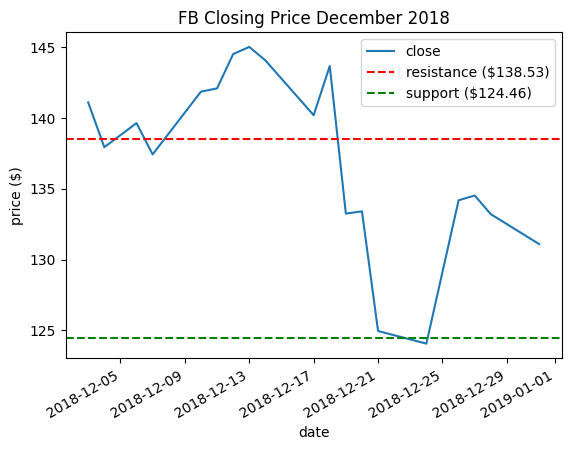

In [4]:
fb.close['2018-12'].plot(title='FB Closing Price December 2018')
plt.axhline(
    y=resistance, color='r', linestyle='--',
    label=f'resistance (${resistance:,.2f})'
)
plt.axhline(
    y=support, color='g', linestyle='--',
    label=f'support (${support:,.2f})'
)
plt.ylabel('price ($)')
plt.legend()

### Líneas verticales de referencia
Para las líneas verticales, utilizamos `axvline()` y proporcionamos el parámetro `x` para saber dónde dibujarla. La función `std_from_mean_kde()` dibuja líneas de referencia verticales utilizando `axvline()` en cada desviación estándar de la media (1-3) y la media.

In [5]:
from viz import std_from_mean_kde
std_from_mean_kde()

Signature: std_from_mean_kde(data)
Source:   
def std_from_mean_kde(data):
    """
    Trazar el KDE junto con las líneas verticales de referencia
    para cada desviación estándar de la media.
    
    Parámetros:
        - Datos: `pandas.Series` con datos numéricos
    
    Devuelve:
        Objeto `Axes` de Matplotlib.
    """
    mean_mag, std_mean = data.mean(), data.std()
    
    ax = data.plot(kind='kde')
    ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')
    
    colors = ['green', 'orange', 'red']
    multipliers = [1, 2, 3]
    signs = ['-', '+']
    linestyles = [':', '-.', '--']
    
    for sign, (color, multiplier, style) in itertools.product(
        signs, zip(colors, multipliers, linestyles)
    ):
        adjustment = multiplier * std_mean
        if sign == '-':
            value = mean_mag - adjustment
            label = '{} {}{}{}'.format(
                r'$\mu$',
                r'$\pm$',
                multiplier,
                r'$\sigma$'
       

Nota, necesitamos importarlo desde el módulo `viz.py`, antes de poder usarlo.

Text(0.5, 0, 'mb earthquake magnitude')

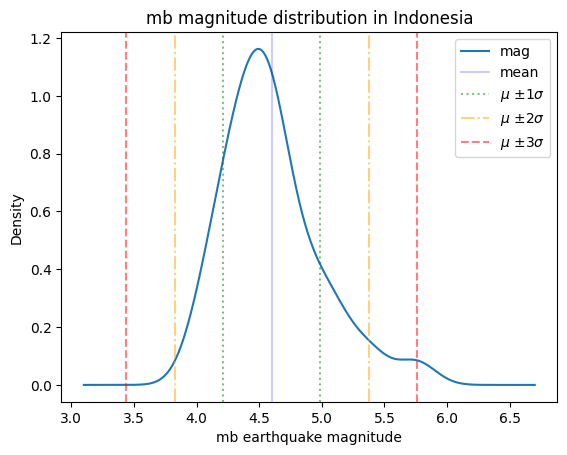

In [6]:
from viz import std_from_mean_kde

ax = std_from_mean_kde(
    quakes.query(
        'magType == "mb" and parsed_place == "Indonesia"'
    ).mag
)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

para qué grafico esto? para saber si hay outliers. aun hay outliers fuera de 3 veces de la desviación estandar + lal media. 

## Sombreado de regiones
Podemos utilizar `axhspan()` y `axvspan()` para sombrear regiones horizontales y verticales, respectivamente.

Text(0, 0.5, 'Price ($)')

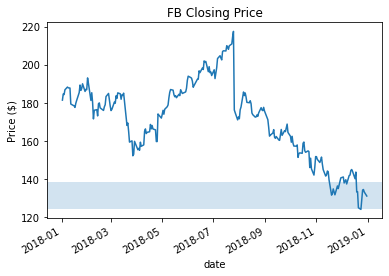

In [7]:
ax = fb.close.plot(title='FB Closing Price')
ax.axhspan(support, resistance, alpha=0.2)
plt.ylabel('Price ($)')

En lugar de rellenar una región rectangular, podemos rellenar entre dos curvas utilizando `plt.fill_between()`:

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

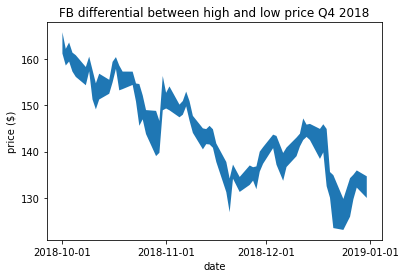

In [8]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')

Podemos especificar un rango concreto a rellenar con el argumento `where`:

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

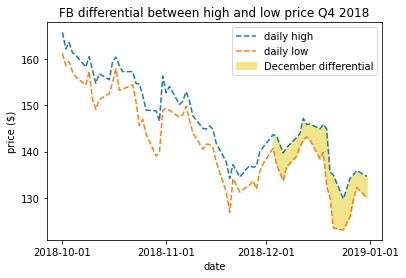

In [9]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(
    fb_q4.index, fb_q4.high, fb_q4.low, 
    where=fb_q4.index.month == 12, 
    color='khaki', label='Diferencial de diciembre'
)
plt.plot(fb_q4.index, fb_q4.high, '--', label='máximo diario')
plt.plot(fb_q4.index, fb_q4.low, '--', label='mínimo diario')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('fecha')
plt.ylabel('precio ($)')
plt.legend()
plt.title('Diferencial FB entre el precio alto y el bajo Q4 2018')

## Anotaciones
La función `plt.annotate()` puede utilizarse para añadir anotaciones a los gráficos. Algunos argumentos importantes:
- `xy`: una tupla de las coordenadas a anotar
- `xytext`: una tupla de coordenadas donde colocar el texto de la anotación
- `arrowprops`: un diccionario de cómo dibujar la flecha desde el texto de la anotación hasta el punto que se anota
- `ha`/`va`: especifican la alineación horizontal/vertical

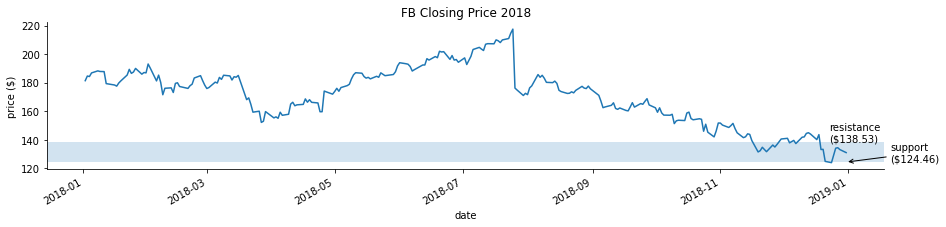

In [10]:
ax = fb.close.plot(title='Precio de cierre de FB en 2018', figsize=(15, 3))
ax.set_ylabel('precio ($)')

ax.axhspan(support, resistance, alpha=0.2)

plt.annotate(
    f'support\n(${support:,.2f})',
    xy=('2018-12-31', support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->'}
)
plt.annotate(
    f'resistance\n(${resistance:,.2f})',
    xy=('2018-12-23', resistance)
)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

We have many options for the arrow:

Text(0, 0.5, 'price ($)')

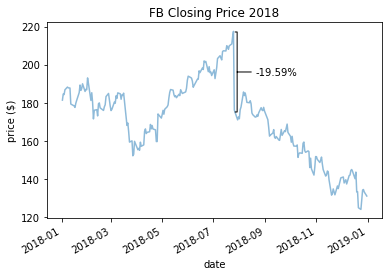

In [11]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='Precio de cierre de FB en 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2')
)
plt.ylabel('price ($)')

También podemos pasar parámetros adicionales a la clase [`matplotlib.text.Text`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text), como `color`, `fontfamily`, `fontsize`, y `fontweight`:

Text(0, 0.5, 'price ($)')

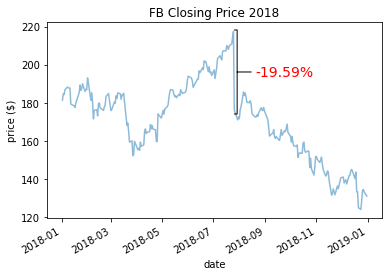

In [12]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price

fb.close.plot(title='Precio de cierre de FB en 2018', alpha=0.5)

plt.annotate(
    f'{pct_drop:.2%}', va='center',
    xy=('2018-07-27', (open_price + close_price) / 2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=3.0,lengthB=0.2'),
    color='red',
    fontsize=14,
    fontweight='medium'
)
plt.ylabel('precio ($)')

## Colores
Podemos pasar colores al argumento `color` del método `plot()`. Puede ser un nombre de color, un código hexadecimal o valores RGB.

Text(0, 0.5, 'price ($)')

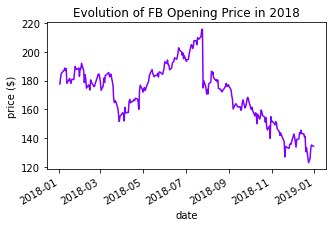

In [13]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color='#8000FF',
    legend=False,
    title='Evolución del precio de apertura de FB en 2018'
)
plt.ylabel('precio ($)')

Los valores RGB deben indicarse como decimales:

Text(0, 0.5, 'price ($)')

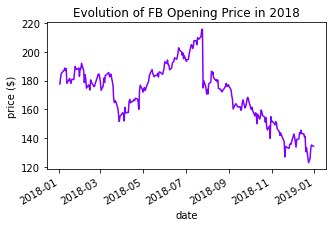

In [14]:
fb.plot(
    y='open',
    figsize=(5, 3),
    color=(128 / 255, 0, 1),
    legend=False,
    title='Evolución del precio de apertura de FB en 2018'
)
plt.ylabel('precio ($)')

### Colormaps
| Clase | Propósito |
| --- | --- |
| Cualitativo | No hay orden ni relación entre los colores; sólo se utilizan para distinguir entre grupos. |
| Secuencial | Para información con secuencia, como la temperatura |
| Divergencia | Hay un valor medio entre dos extremos que tiene significado; por ejemplo, los coeficientes de correlación están acotados en el rango `[-1, 1]`, y `0` tiene significado (sin correlación) |

#### Encontrar colormap disponibles

In [15]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Podemos pasar un mapa de colores al argumento `colormap`:

Text(0, 0.5, 'precio ($)')

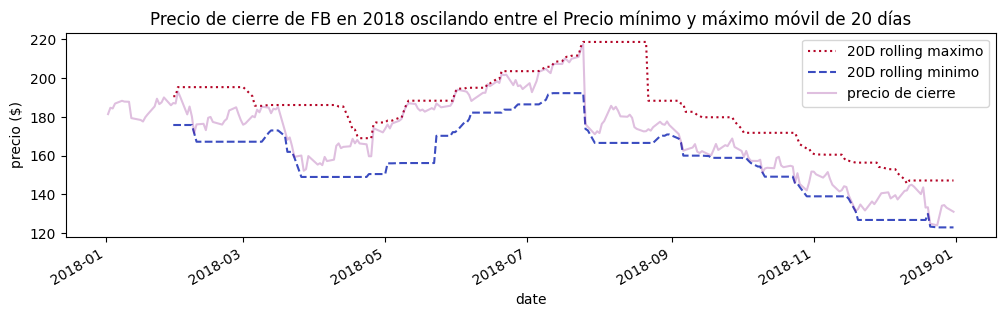

In [7]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max()
).plot(
    y=['rolling_max', 'rolling_min'], 
    colormap='coolwarm_r', 
    label=['20D rolling maximo', '20D rolling minimo'],
    style=[':', '--'],
    figsize=(12, 3),
    title='Precio de cierre de FB en 2018 oscilando entre el Precio mínimo y máximo móvil de 20 días'
)
ax.plot(fb.close, 'purple', alpha=0.25, label='precio de cierre')
plt.legend()
plt.ylabel('precio ($)')

También podemos tomar los colores de un mapa de color, que es un callable. Esto nos da un color RGBA, que ya sabemos que puede ser utilizado como el `color` para la trama:

In [17]:
cm.get_cmap('ocean')(.5)

(0.0, 0.2529411764705882, 0.5019607843137255, 1.0)

#### Creando colormaps
Con el fin de hacer mapas de colores, necesitamos algunas funciones de utilidad que se pueden encontrar en el módulo `color_utils.py`. Tendremos que ser capaces de convertir colores hexadecimales a decimales RGBA, mezclar colores para construir un mapa de colores, y dibujar el mapa de colores.

In [9]:
import color_utils

##### Blended colormaps
Utilice `blended_cmap()` para mezclar cualquier número de colores:

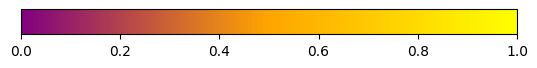

In [10]:
my_colors = ['#800080', '#FFA500', '#FFFF00']
rgbs = color_utils.hex_to_rgb_color_list(my_colors)
my_cmap = color_utils.blended_cmap(rgbs)
color_utils.draw_cmap(my_cmap, orientation='horizontal')

*Nota: La función `draw_cmap()` también facilita la adición de una barra de color con nuestro propio mapa de color al gráfico de nuestra elección. Echa un vistazo al cuaderno [`covid19.ipynb`](./covid19.ipynb) para ver esto en acción.*

#### Paletas de colores Seaborn
Seaborn también proporciona paletas de colores adicionales, junto con funciones de utilidad para elegir mapas de colores y hacer otros personalizados de forma interactiva en Jupyter. Ver [este tutorial](https://seaborn.pydata.org/tutorial/color_palettes.html) para más información.

##### Mostrando una paleta de colores

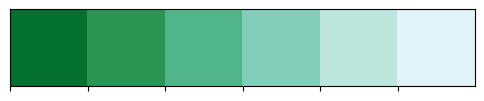

In [11]:
import seaborn as sns

sns.palplot(sns.color_palette("BuGn_r"))

##### Construcción interactiva de una paleta de colores para su uso con matplotlib

In [12]:
diverging_cmap = sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

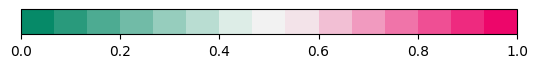

In [13]:
from matplotlib.colors import ListedColormap
color_utils.draw_cmap(ListedColormap(diverging_cmap), orientation='horizontal')

#### Ciclo a través de los colores
Podemos utilizar itertools para recorrer los colores:

In [15]:
import itertools

colors = itertools.cycle(['#ffffff', '#f0f0f0', '#000000'])
colors

In [16]:
next(colors)

'#ffffff'

O podemos trabajar con un objeto `ListedColormap`:

In [17]:
from matplotlib.colors import ListedColormap
red_black = ListedColormap(['red', 'black'], N=2000)
[red_black(i) for i in range(3)]

[(1.0, 0.0, 0.0, 1.0), (0.0, 0.0, 0.0, 1.0), (1.0, 0.0, 0.0, 1.0)]

También podemos considerar el uso de un generador:

In [18]:
def color_generator():
    for year in range(1992, 200019):
        if year % 100 == 0 and year % 400 != 0:
            # caso especial (divisible por 100 pero no por 400)
            color = '#f0f0f0'
        elif year % 4 == 0:
            # año bisiesto (divisible por 4)
            color = '#000000'
        else:
            color = '#ffffff'
        yield color
    
year_colors = color_generator()
year_colors

<generator object color_generator at 0x000001C885D697E0>

In [27]:
next(year_colors)

'#000000'

También podemos hacer un generador con una expresión generadora:

In [28]:
year_colors = (
    '#ffffff'
    if (not year % 100 and year % 400) or year % 4
    else '#000000' for year in range(1992, 200019)
)
year_colors

<generator object <genexpr> at 0x7bef14415138>

In [29]:
next(year_colors)

'#000000'

## Texturas
Podemos añadir texturas a nuestros gráficos mediante el parámetro `hatch` de `matplotlib`. Las opciones actuales son: {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}

[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

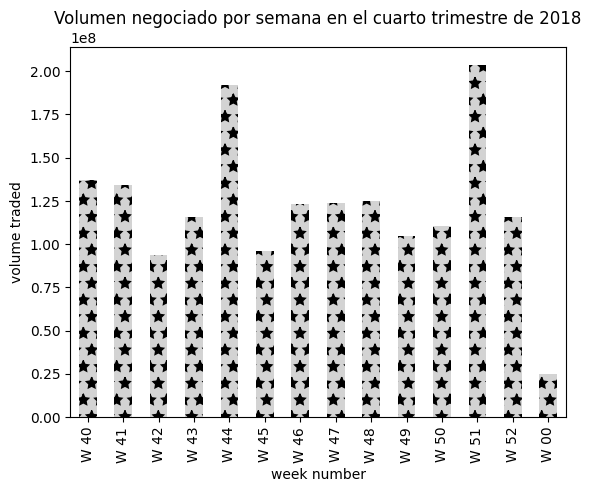

In [19]:
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')
ax = weekly_volume_traded.plot(
    kind='bar', hatch='*', color='lightgray',# hatch hace el relleno 
    title='Volumen negociado por semana en el cuarto trimestre de 2018'
)
ax.set(xlabel='week number', ylabel='volume traded')

Podemos combinar texturas para crear otras nuevas y repetirlas para intensificar el efecto:

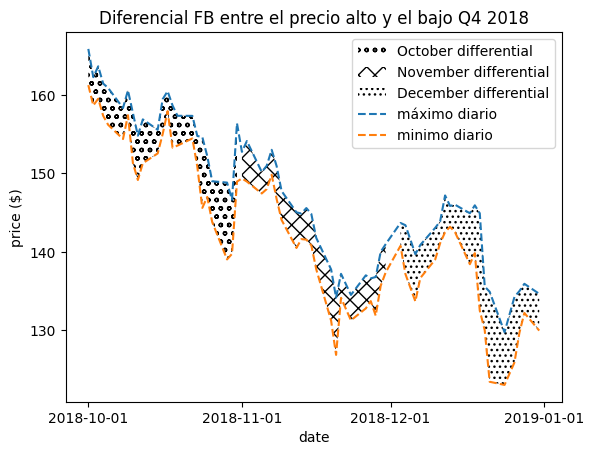

In [20]:
import calendar

fb_q4 = fb.loc['2018-Q4']

for texture, month in zip(['oo', '/\\/\\', '...'], [10, 11, 12]):
    plt.fill_between(
        fb_q4.index, fb_q4.high, fb_q4.low, hatch=texture, 
        where=fb_q4.index.month == month, facecolor='white',
        label=f'{calendar.month_name[month]} differential'
    )

plt.plot(fb_q4.index, fb_q4.high, '--', label='máximo diario')
plt.plot(fb_q4.index, fb_q4.low, '--', label='minimo diario')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('Diferencial FB entre el precio alto y el bajo Q4 2018')
plt.legend()

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="./2-formateando_plots.ipynb">
            <button>&#8592; Notebook Anterior</button>
        </a>
    </div>
    <div style="text-align: center;">
        <a href="../../solutions/ch_06/solutions.ipynb">
            <button>Soluciones</button>
        </a>
    </div>
    <div style="text-align: right;">
        <a href="../ch_07/analisis_financiero.ipynb">
            <button>Capitulo 7 &#8594;</button>
        </a>
    </div>
</div>